## CODSOFT INTERNSHIP
varad patil
120A2036

### Adding the dataset from kaggle

In [2]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### make a temporary directory

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/kaggle_dataset'

In [5]:
!pwd

/content


In [6]:
%cd drive/MyDrive/Colab Notebooks/kaggle_dataset

/content/drive/MyDrive/Colab Notebooks/kaggle_dataset


In [7]:
!pwd

/content/drive/MyDrive/Colab Notebooks/kaggle_dataset


In [8]:
!kaggle datasets download -d kartik2112/fraud-detection

fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fraudTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Importing Library

In [10]:
from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [12]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
print('train:', train.shape)
print('test:', test.shape)

train: (1296675, 23)
test: (555719, 23)


### merging both dataset

In [15]:
data = pd.concat([train, test])

In [16]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [17]:
print('data:', data.shape)

data: (1852394, 23)


In [18]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [20]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [22]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


<Axes: >

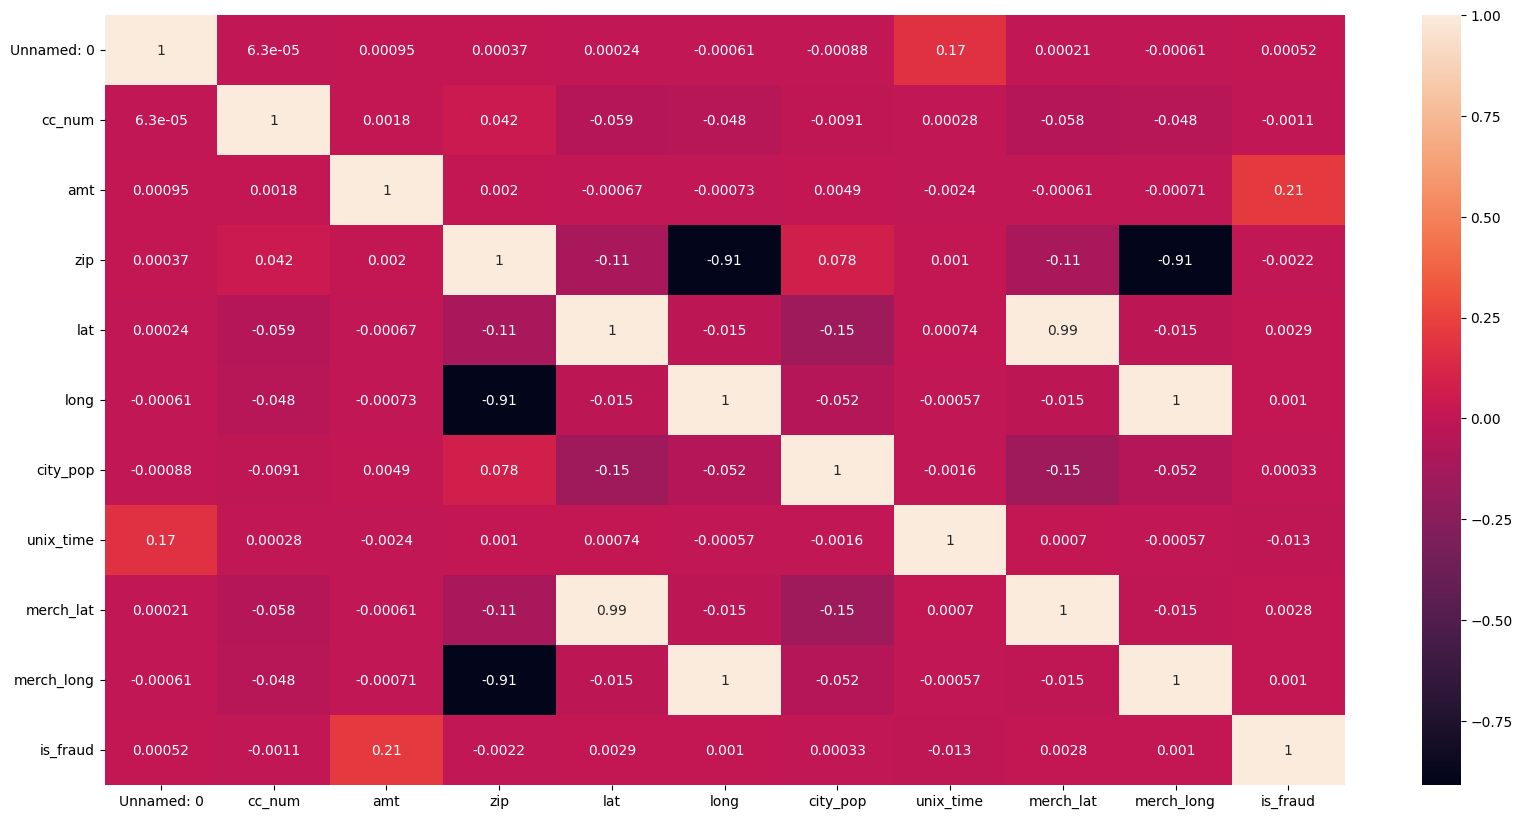

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True)

In [24]:
for i in data.columns:
  num = len(data[i].unique())
  print(i,':', str(num) + str(' Distinct values'))

Unnamed: 0 : 1296675 Distinct values
trans_date_trans_time : 1819551 Distinct values
cc_num : 999 Distinct values
merchant : 693 Distinct values
category : 14 Distinct values
amt : 60616 Distinct values
first : 355 Distinct values
last : 486 Distinct values
gender : 2 Distinct values
street : 999 Distinct values
city : 906 Distinct values
state : 51 Distinct values
zip : 985 Distinct values
lat : 983 Distinct values
long : 983 Distinct values
city_pop : 891 Distinct values
job : 497 Distinct values
dob : 984 Distinct values
trans_num : 1852394 Distinct values
unix_time : 1819583 Distinct values
merch_lat : 1754157 Distinct values
merch_long : 1809753 Distinct values
is_fraud : 2 Distinct values


In [25]:
data.drop(columns=['Unnamed: 0'], inplace=True)

### calculating age from dob and transaction time

In [26]:
transaction_date = pd.to_datetime(data['trans_date_trans_time'])
birth_date = pd.to_datetime(data['dob'])
year_timedelta = np.timedelta64(1, 'Y')
data['age'] = np.int64((transaction_date - birth_date) / year_timedelta)

In [27]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,30
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,56
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,51
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,32


### Data Visulaization

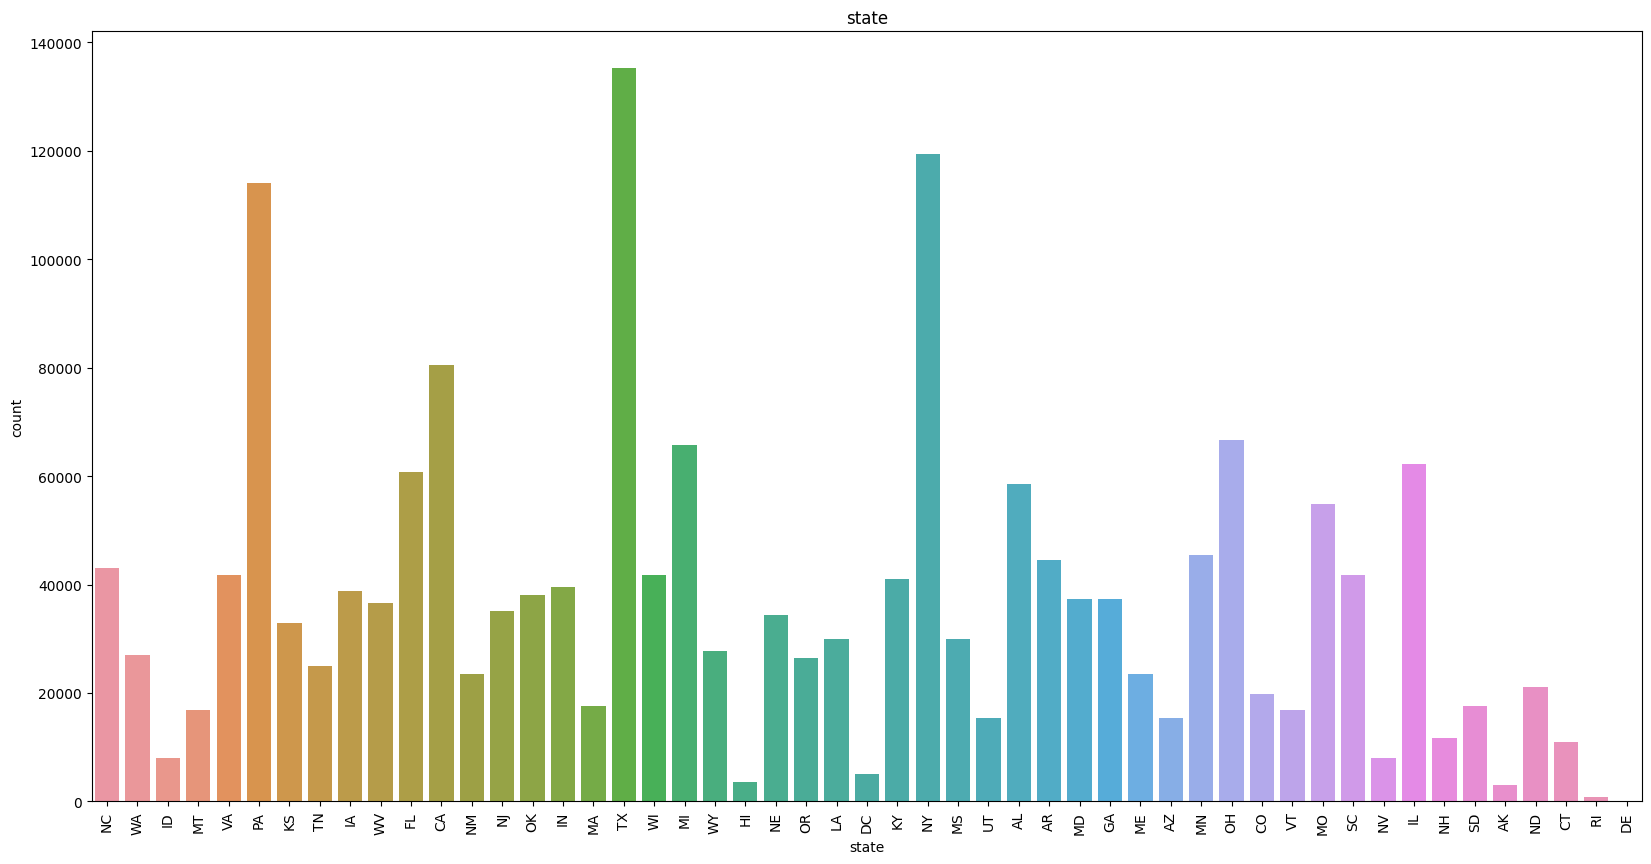

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x='state', data=data)
plt.title('state')
plt.xticks(rotation=90)
plt.show()

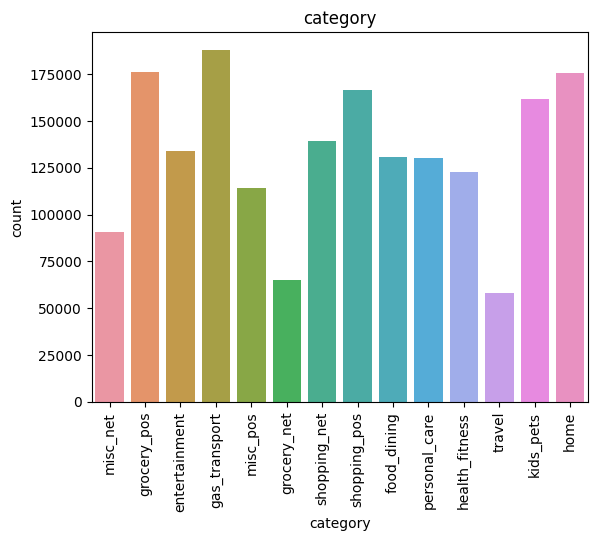

In [29]:
sns.countplot(x='category', data=data)
plt.title('category')
plt.xticks(rotation=90)
plt.show()

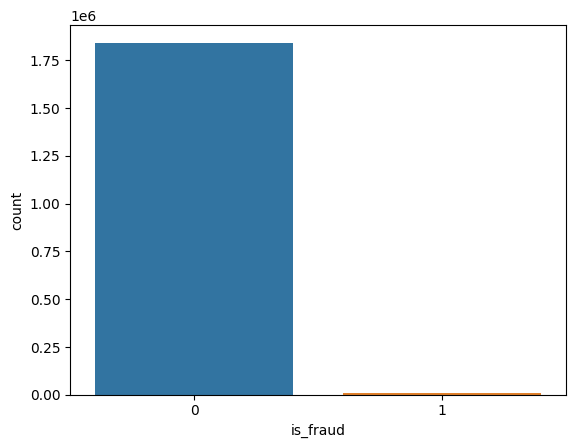

In [30]:
sns.countplot(data = data, x = data['is_fraud'])
plt.show()

In [31]:
print("Number of is_fraud data:\n\n",data['is_fraud'].value_counts())

Number of is_fraud data:

 0    1842743
1       9651
Name: is_fraud, dtype: int64


from this we can see that amount fraud = 0 is more than fraud = 1. As our data is not balanced it may lead to overfitting

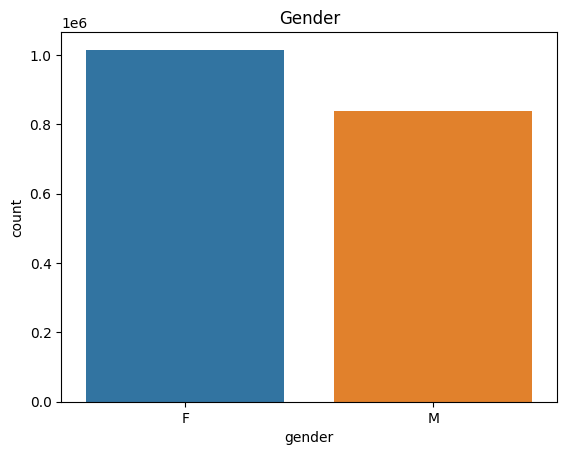

In [32]:
sns.countplot(x='gender', data=data)
plt.title('Gender')
plt.show()

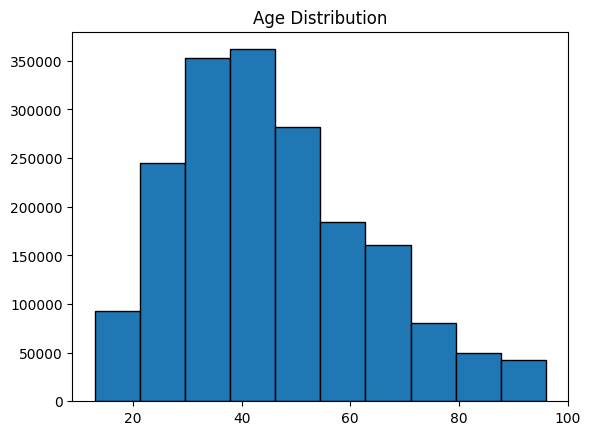

In [33]:
plt.hist(data['age'], edgecolor='black')
plt.title('Age Distribution')
plt.show()

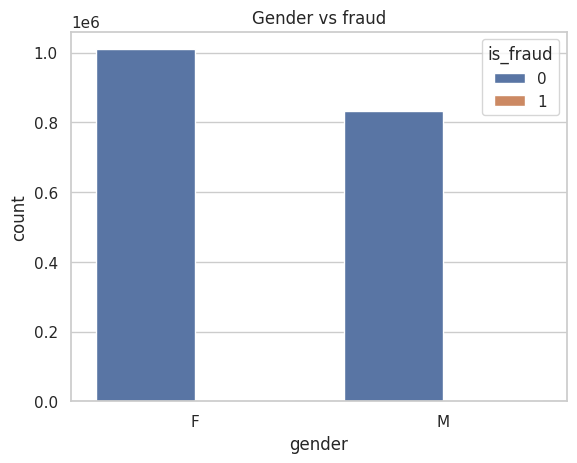

In [34]:
sns.set(style="whitegrid")
sns.countplot(x='gender', hue='is_fraud', data=data)
plt.title('Gender vs fraud')
plt.show()

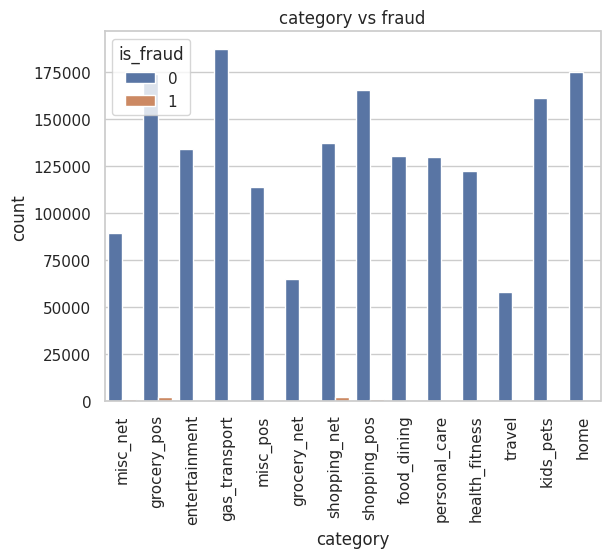

In [35]:
sns.set(style="whitegrid")
sns.countplot(x='category', hue='is_fraud', data=data)
plt.title('category vs fraud')
plt.xticks(rotation=90)
plt.show()

### Data preprocessing

In [36]:
from sklearn.utils import resample, shuffle
df_minority = data[data['is_fraud'].values==1]
df_majority = data[data['is_fraud'].values==0]
#print(len(df_minority), len(df_majority))
df_majority_downsampled = resample(df_majority, n_samples=18427, random_state=42)
new_data = pd.concat([df_minority, df_majority_downsampled])
new_data = shuffle(new_data, random_state=42 )

In [37]:
new_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
691934,2019-10-21 21:46:04,4102003771126577611,fraud_Block Group,misc_pos,4.23,William,Fitzgerald,M,715 Courtney Pike Suite 932,Keller,...,-97.2489,95035,Probation officer,1987-06-13,1e4ee6de34a2c4b2b3c0f09f59ddb6a7,1350855964,32.144236,-96.881092,0,32
995705,2020-02-11 01:24:02,4997733566924489,fraud_Zemlak Group,misc_net,739.44,Stephanie,Taylor,F,598 Martin Pine Suite 365,Saint Paul,...,-92.9487,753116,Fisheries officer,1971-08-06,1174c16a2252642d17ca7a8d6dc143ff,1360545842,44.826051,-92.038774,1,48
505622,2020-12-21 01:38:01,5540636818935089,fraud_Huel Ltd,misc_net,6.74,Kenneth,Foster,M,329 Michael Extension,Lawrence,...,-71.1605,76383,Geoscientist,1985-04-04,c6646c84f4528cadacc3eaa2b42e65b6,1387589881,42.739623,-71.701152,0,35
441467,2020-12-06 23:53:03,3564182536169293,fraud_Boyer PLC,shopping_net,1073.81,Brenda,Johnson,F,56160 Nicholas Isle,Norwich,...,-81.8024,1443,Research scientist (medical),1962-03-04,e3b6952aeef3a979761ba5d949d07757,1386373983,40.564654,-81.708551,1,58
47764,2019-01-28 23:14:49,373213026644490,"fraud_Romaguera, Cruickshank and Greenholt",shopping_net,1058.01,Bobby,Smith,M,3495 Williams Stream,San Diego,...,-117.1593,1241364,Comptroller,1987-11-30,e6cbed473965d31cd4a258344dd0bd8c,1327792489,33.259031,-117.083503,1,31


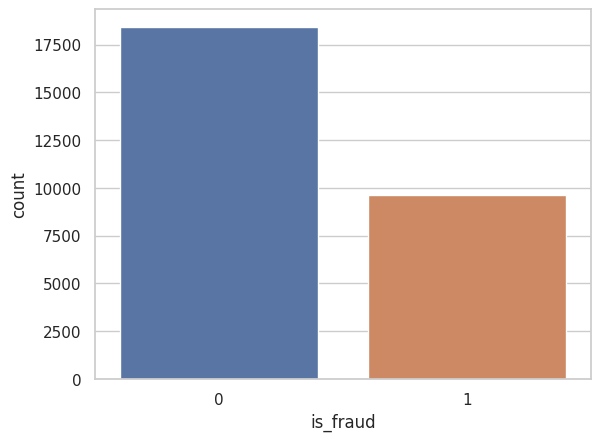

In [38]:
sns.countplot(data = data, x = new_data['is_fraud'])
plt.show()

In [39]:
print("Number of is_fraud data:\n\n",new_data['is_fraud'].value_counts())

Number of is_fraud data:

 0    18427
1     9651
Name: is_fraud, dtype: int64


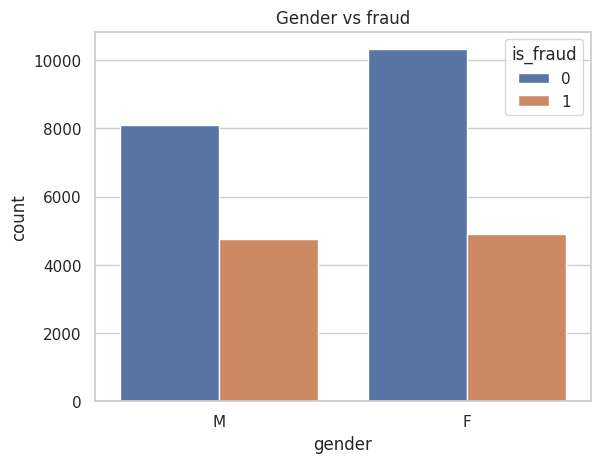

In [40]:
sns.countplot(x='gender', hue='is_fraud', data=new_data)
plt.title('Gender vs fraud')
plt.show()

selecting the columns

In [41]:
drops = [ 'cc_num', 'state', 'amt', 'category', 'gender',  'job', 'age', 'is_fraud' ]

In [42]:
processed_data = new_data[drops]

In [43]:
processed_data.head()

,cc_num,state,amt,category,gender,job,age,is_fraud
691934,4102003771126577611,TX,4.23,misc_pos,M,Probation officer,32,0
995705,4997733566924489,MN,739.44,misc_net,F,Fisheries officer,48,1
505622,5540636818935089,MA,6.74,misc_net,M,Geoscientist,35,0
441467,3564182536169293,OH,1073.81,shopping_net,F,Research scientist (medical),58,1
47764,373213026644490,CA,1058.01,shopping_net,M,Comptroller,31,1


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
processed_data['gender'] = le.fit_transform(processed_data['gender'])
processed_data['category'] = le.fit_transform(processed_data['category'])
processed_data['job'] = le.fit_transform(processed_data['job'])
processed_data['state'] = le.fit_transform(processed_data['state'])

In [45]:
processed_data.head()

,cc_num,state,amt,category,gender,job,age,is_fraud
691934,4102003771126577611,43,4.23,9,1,355,32,0
995705,4997733566924489,23,739.44,8,0,199,48,1
505622,5540636818935089,19,6.74,8,1,216,35,0
441467,3564182536169293,35,1073.81,11,0,396,58,1
47764,373213026644490,4,1058.01,11,1,102,31,1


<Axes: >

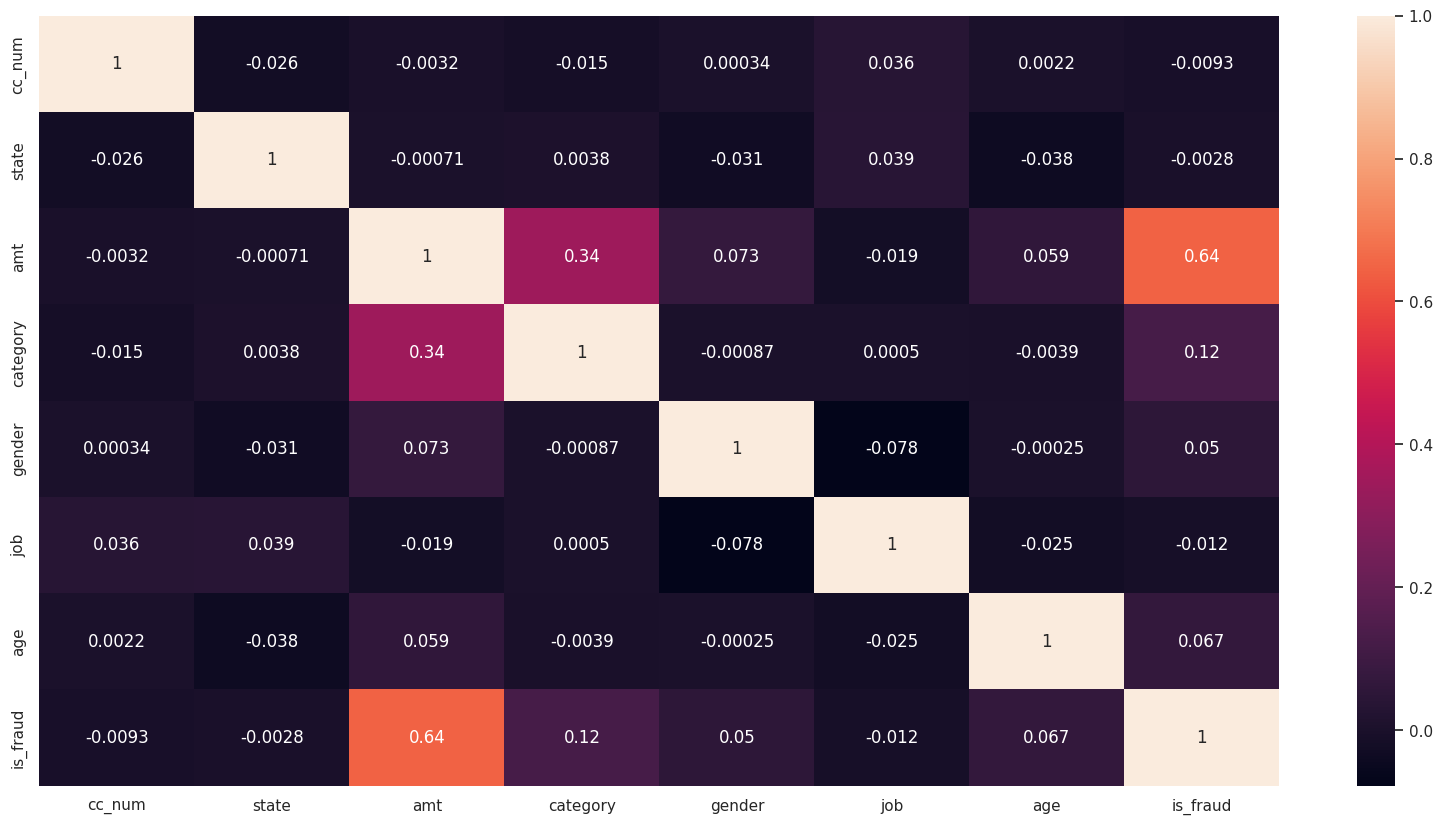

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(processed_data.corr(), annot = True)

In [47]:
#from above matrix we can say that job, state and cc_num are not that important for predicting fraud
x = processed_data.iloc[:,[2,4,6]].values
y = processed_data.iloc[:,-1:].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [48]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(22462, 3) (5616, 3)
(22462, 1) (5616, 1)


In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [51]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [52]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [53]:
classifier = [log, svc, clf]
model = ['Logistic', 'Support Vector', 'Naive Bayes']


for Logistic:

89.19159544159544
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3700
           1       0.95      0.72      0.82      1916

    accuracy                           0.89      5616
   macro avg       0.91      0.85      0.87      5616
weighted avg       0.90      0.89      0.89      5616



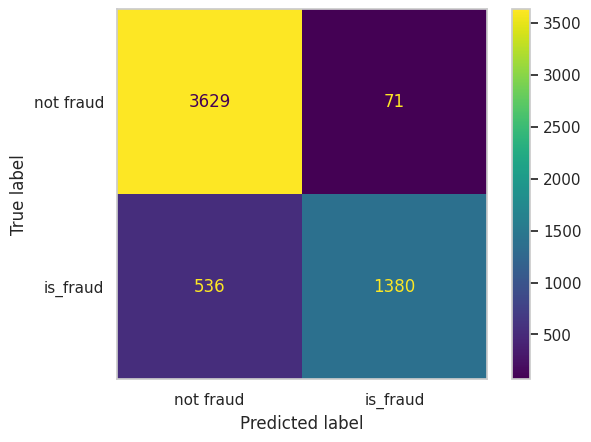


for Support Vector:

89.85042735042735
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      3700
           1       0.94      0.75      0.83      1916

    accuracy                           0.90      5616
   macro avg       0.91      0.86      0.88      5616
weighted avg       0.90      0.90      0.90      5616



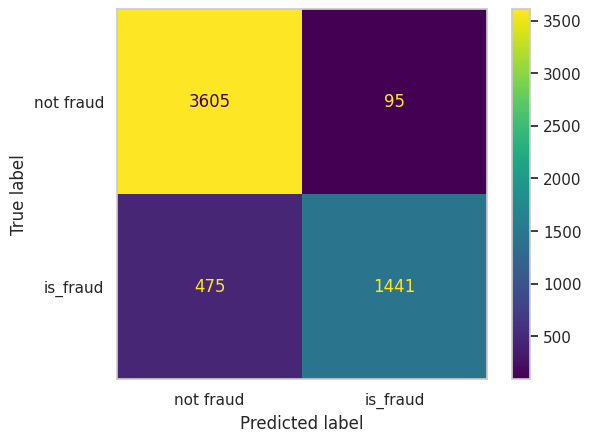


for Naive Bayes:

82.97720797720798
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      3700
           1       0.95      0.53      0.68      1916

    accuracy                           0.83      5616
   macro avg       0.88      0.76      0.78      5616
weighted avg       0.85      0.83      0.81      5616



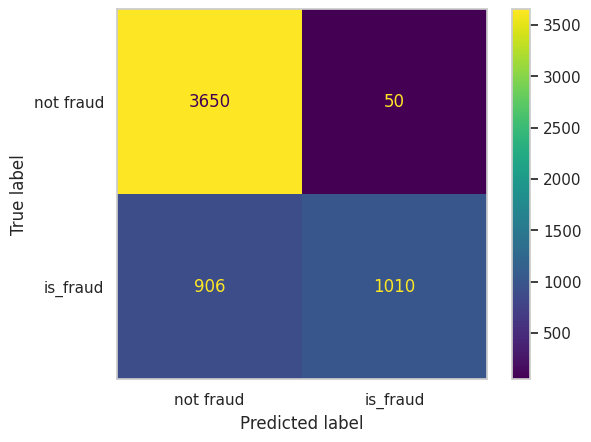

In [78]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
for i in range(len(classifier)):
  y_pred = classifier[i].predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)*100
  print('\nfor ' + str(model[i]) + ':\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not fraud', 'is_fraud'])
  plt.rcParams['axes.grid'] = False
  disp.plot()
  print(accuracy)
  print(classification_report(y_test, y_pred))
  plt.show()

In [79]:
from sklearn.model_selection import cross_val_score
for i in classifier:
  accuracies  = cross_val_score(estimator=i, X = x_train, y = y_train, cv = 10)
  print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.79 %
Standard Deviation: 0.83 %
Accuracy: 89.55 %
Standard Deviation: 0.95 %
Accuracy: 82.60 %
Standard Deviation: 1.54 %
